In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import joblib

In [2]:
data=pd.read_csv("C:/Users/sam/CODEs/t4/dataset/hrv_stress_data.csv")

combined_data=pd.read_csv("C:/Users/sam/CODEs/t4/dataset/combined_hrv_data.csv")


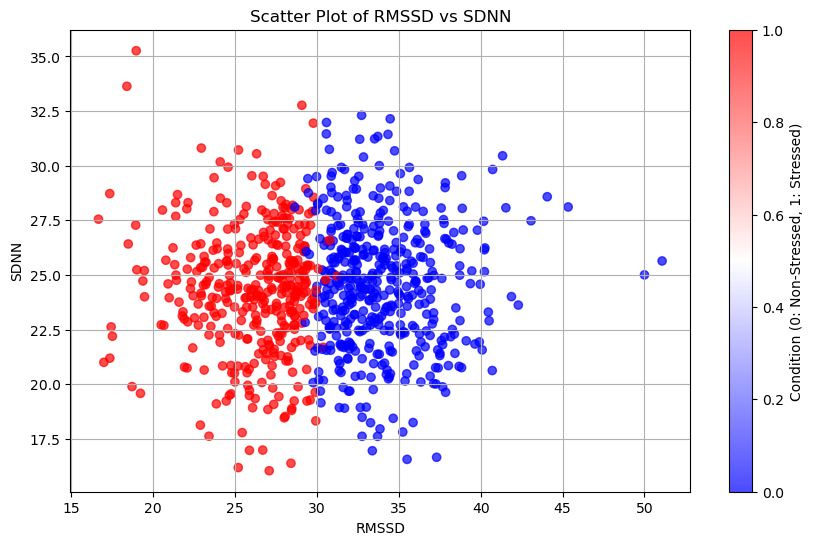

In [3]:

plt.figure(figsize=(10, 6))
plt.scatter(combined_data['RMSSD'], combined_data['SDNN'], c=combined_data['condition'], cmap='bwr', alpha=0.7)
plt.title('Scatter Plot of RMSSD vs SDNN')
plt.xlabel('RMSSD')
plt.ylabel('SDNN')
plt.colorbar(label='Condition (0: Non-Stressed, 1: Stressed)')
plt.grid()
plt.show()


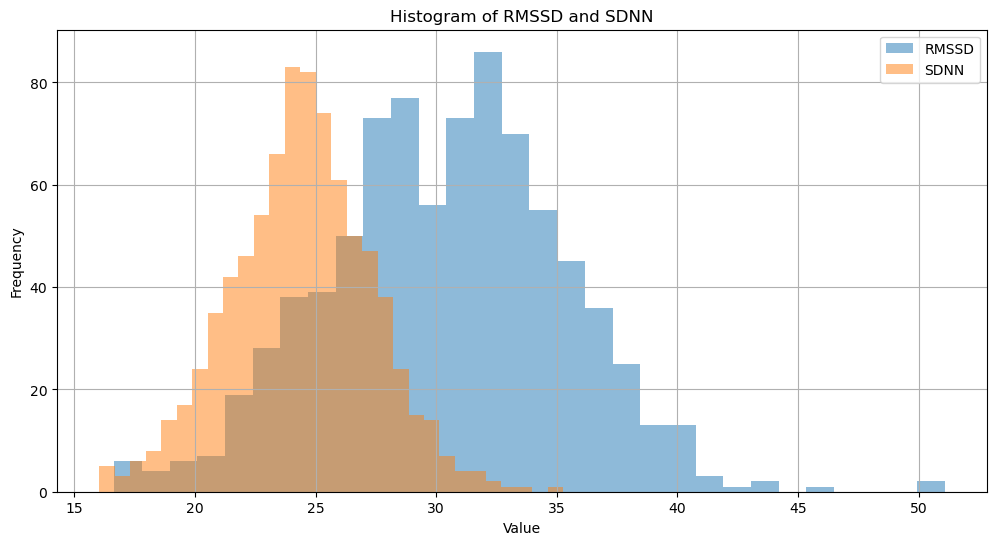

In [4]:
plt.figure(figsize=(12, 6))
plt.hist(combined_data['RMSSD'], bins=30, alpha=0.5, label='RMSSD')
plt.hist(combined_data['SDNN'], bins=30, alpha=0.5, label='SDNN')
plt.title('Histogram of RMSSD and SDNN')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()


In [23]:

features = combined_data[['RMSSD', 'SDNN']]  
labels = combined_data['condition'] 
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42,stratify=labels)


In [32]:


model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [26]:
import pickle
with open("ppgStress.pkl","wb") as f:
  pickle.dump(model,f)

In [31]:
with open("ppgStress.pkl","rb") as f:
  loaded_object=pickle.load(f)
type(loaded_object)  

sklearn.ensemble._forest.RandomForestClassifier

In [33]:
from sklearn.metrics import accuracy_score, classification_report
predictions = loaded_object.predict(X_test)
print(classification_report(y_test, predictions))
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        90
           1       0.99      0.97      0.98        76

    accuracy                           0.98       166
   macro avg       0.98      0.98      0.98       166
weighted avg       0.98      0.98      0.98       166

Accuracy: 98.19%


In [29]:
with open('ppgStress.pkl', 'rb') as f:
    model = pickle.load(f)


new_data = {
    'RMSSD': [25.0, 15.5, 35.2,33.19366595990731],  # New RMSSD values
    'SDNN': [30.5, 28.3, 32.1,23.813797092450763]     # Corresponding SDNN values
}
input_df = pd.DataFrame(new_data)

predictions = model.predict(input_df)

input_df['predicted_condition'] = predictions

for i, prediction in enumerate(predictions):
    state = "Calm" if prediction == 0 else "Stressed"
    print(f"Input: RMSSD = {input_df['RMSSD'][i]}, SDNN = {input_df['SDNN'][i]} -> Prediction: {state}")

Input: RMSSD = 25.0, SDNN = 30.5 -> Prediction: Stressed
Input: RMSSD = 15.5, SDNN = 28.3 -> Prediction: Stressed
Input: RMSSD = 35.2, SDNN = 32.1 -> Prediction: Calm
Input: RMSSD = 33.19366595990731, SDNN = 23.813797092450763 -> Prediction: Calm


In [36]:

X = combined_data[['RMSSD', 'SDNN']]  
y = combined_data['condition']  


model = RandomForestClassifier()  # Use your trained model's parameters here if any


cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Accuracy Scores: [0.97590361 0.9939759  0.97590361 0.95151515 0.96969697]
Mean CV Accuracy: 0.9733990507484485


In [37]:

model.fit(X, y)

importances = model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:\n", feature_importance_df)


Feature Importances:
   Feature  Importance
0   RMSSD    0.952168
1    SDNN    0.047832


In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
model = RandomForestClassifier()

# Set up the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters: ", grid_search.best_params_)


Best Parameters:  {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}


              precision    recall  f1-score   support

           0       0.98      0.98      0.98        90
           1       0.97      0.97      0.97        76

    accuracy                           0.98       166
   macro avg       0.98      0.98      0.98       166
weighted avg       0.98      0.98      0.98       166



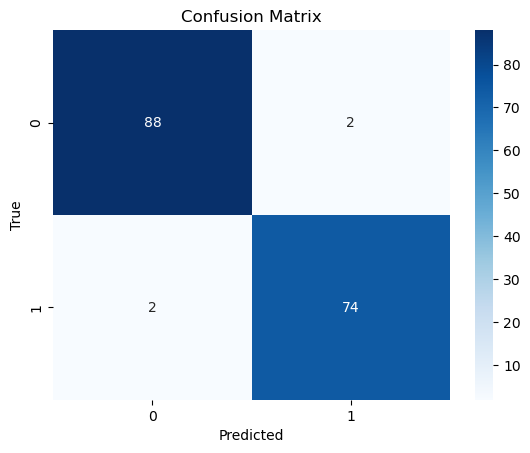

In [45]:
from sklearn.metrics import confusion_matrix
best_model = RandomForestClassifier(
    max_depth=None,
    min_samples_split=10,
    n_estimators=50,
    random_state=42
)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [47]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


In [ ]:

with open('ppgStress.pkl', 'rb') as file:
    model = pickle.load(file)

def get_age_based_threshold(age):
    
    base_threshold = 30
    return max(15, base_threshold - (0.2 * max(0, age - 30)))  # e.g., reduces by 0.2ms per year over 30

def predict_stress(rmssd, sdnn, age):
   
    rmssd_threshold = get_age_based_threshold(age)
    
   
    if rmssd < rmssd_threshold:
        print(f"RMSSD ({rmssd:.2f} ms) below threshold ({rmssd_threshold:.2f} ms): Stress likely.")
    
    # Prepare data for the model prediction
    input_data = pd.DataFrame({'RMSSD': [rmssd], 'SDNN': [sdnn]})
    prediction = model.predict(input_data)[0]
    
    if prediction == 1:
        return "Stress detected based on model."
    else:
        return "Calm detected based on model."

# Example usage
rmssd = 28 
sdnn = 50   
age = 65    

result = predict_stress(rmssd, sdnn, age)
print(result)


Stress detected based on model.
